In [1]:
'''
 Schema per lo sviluppo del metodo di Numerov 
'''
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import trapz

In [2]:
 def V(xi):
    return xi**2


def b(eps,xi):
    return (h**2/12)*(2*eps-xi**2)

In [3]:

def numerov(n1,n2,eps):
    psi = np.array(xi)*0  # copio xi in psi e lo azzero
    j   = np.sign(n2-n1)
    psi[n1]=0
    psi[n1+j]=1.0e-6

    for i in range(n1+2*j,n2+j,j):
       psi[i] = ( 2*psi[i-j]*(1-5*b(eps,xi[i-j])) - psi[i-2*j]*(1+b(eps,xi[i-2*j])))/(1+b(eps,xi[i]))
    return psi

In [4]:

def evalDerivative(eps):
    global psir,psil
    psil = numerov(0,nmatch+1,eps)
    psir = numerov(n-1,nmatch-1,eps)

    psir = (psil[nmatch]/psir[nmatch])*psir
 
    der_r = (psir[nmatch+1]-psir[nmatch-1])/(2*h)
    der_l = (psil[nmatch+1]-psil[nmatch-1])/(2*h)
  
    diff = der_l-der_r

    return diff


In [5]:
''' 
  Metodo di bisezione per trovare l'energia in cui la funzione evalDerivative
  e' nulla. Cioe' l'enegia per cui  la derivata sinistra e destra coincidono 
'''

def findE(emin,emax,tol):
    while (emax-emin>tol):
        emed = (emin+emax)/2
        if evalDerivative(emin)*evalDerivative(emed)<0:
            emax = emed
        else:
            emin = emed
    return (emin+emax)/2;


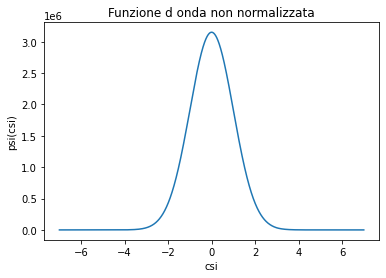

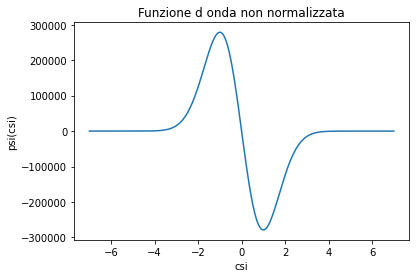

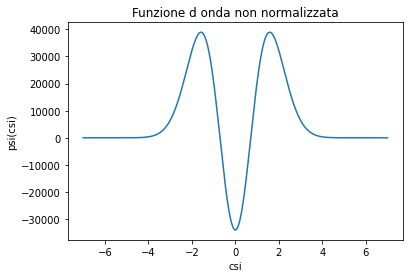

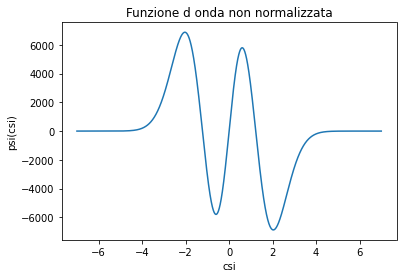

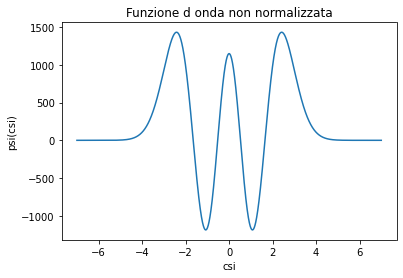

Per valori di Epsilon compresi tra 0 e 5 quelli che corrispondono a stati fisici sono:
0.4999658203125
1.4999853515625006
2.5000048828125
3.5000244140624988
4.5000439453124965


In [6]:
''' 
  Codice principale: l'esecuzione dello script parte da qui
'''
n       = 14000
nmatch  = 10000
xi      = np.linspace(-7.,7,n)
h       = xi[1]-xi[0]

Emin=0
Emax=5
delta_e=0.09
energy=delta_e
Epsilon=[]


while (energy<Emax):
    if(evalDerivative(energy)*evalDerivative(energy+delta_e)<0):
        Epsilon.append(findE(energy,energy+delta_e,0.0001))
        psiTot=np.empty(n)
        for i in range(0,nmatch+1):
            psiTot[i]=psil[i]

        for i in range(nmatch+1,n):
            psiTot[i]=psir[i]

        plt.plot(xi,psiTot)
        plt.xlabel('csi')
        plt.ylabel('psi(csi)')
        plt.title('Funzione d onda non normalizzata')
        plt.show()
    energy+=delta_e
    
print('Per valori di Epsilon compresi tra 0 e 5 quelli che corrispondono a stati fisici sono:')
print(Epsilon[0])
print(Epsilon[1])
print(Epsilon[2])
print(Epsilon[3])
print(Epsilon[4])



alpha = 187526799809.2301


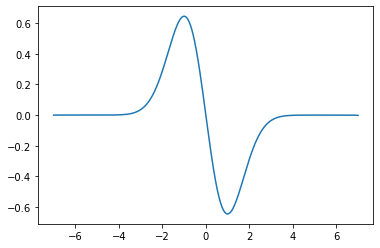

In [7]:
epsilon0 = 1.5   # o altra energia di stato definito eps = (n+1/2)

psi0=numerov(0,n-1,epsilon0)
I0=trapz(abs(psi0)**2,xi)
print("alpha =",I0)

psi0N=psi0/math.sqrt(abs(I0))

plt.plot(xi,psi0N)
plt.show()

17616631777246.86
187526799809.2301
4084237381.82113


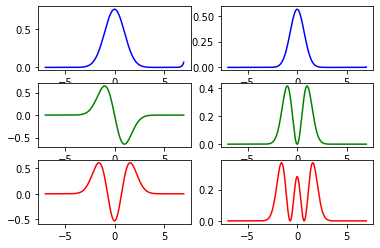

In [10]:
epsilon=[0.5,1.5,2.5]

f0=numerov(0,n-1,epsilon[0])
f1=numerov(0,n-1,epsilon[1])
f2=numerov(0,n-1,epsilon[2])

g0=abs(f0)**2
g1=abs(f1)**2
g2=abs(f2)**2

I0=trapz(abs(f0)**2,xi)
I1=trapz(abs(f1)**2,xi)
I2=trapz(abs(f2)**2,xi)

f0N=f0/math.sqrt(I0)
f1N=f1/math.sqrt(I1)
f2N=f2/math.sqrt(I2)

g0N=g0/I0
g1N=g1/I1
g2N=g2/I2


fig,((ax0,ax1),(ax2,ax3),(ax4,ax5))=plt.subplots(3,2)
ax0.plot(xi,f0N,color='b')
ax1.plot(xi,g0N,color='b')
ax2.plot(xi,f1N,color='g')
ax3.plot(xi,g1N,color='g')
ax4.plot(xi,f2N,color='r')
ax5.plot(xi,g2N,color='r')

print(I0)
print(I1)
print(I2)